# Telco Customer Churn Analysis

We have a classification problem. We wil make classification on the target variable Churn and we will build a model to get best classification possible on the target variable. We will look at the balance of the target variable. As we will see later, our target variable has imblanced data For that reason we are not going to use Accuracy score, Based on the problem on the hand, we will use Recall score. In order to combat class imbalance we can consider under/oversampling or drawing test data with equal proportions of classes.

## Data Dictionary

- CustomerID: A unique ID that identifies each customer.
- Gender: The customer’s gender: Male, Female
- Age: The customer’s current age, in years, at the time the fiscal quarter ended.
- Senior Citizen: Indicates if the customer is 65 or older: Yes, No
- Married (Partner): Indicates if the customer is married: Yes, No
- Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- Number of Dependents: Indicates the number of dependents that live with the customer.
- Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- Tenure: Indicates the total amount of months that the customer has been with the company.
- Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Data Source - https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Exploratory Data Analysis
Importing necessary libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

Data import and first glimpse

In [3]:
df=pd.read_csv(r'C:\Users\xtaym\Desktop\VSC projects\datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
print(df.isna().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
print(df.duplicated().sum())

0


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Our data is complete. No records are duplicated nor missing. We will modify few columns:
- customerID - dropped because it has no influence on churn
- TotalCharges - changing datatype from object to float
- Churn - We will encode churn to 0/1 values

In [7]:
df=df.drop(columns='customerID',axis=1)
# we encountered a problem when converting Charges to float type, there were empty values. We converted them to Nan's and then converted column to float
df['TotalCharges']=df['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

There is a imbalance across classes it will be taken into account when sampling data for model developement.

## Target Variable

Churn
No     5174
Yes    1869
Name: count, dtype: int64 
 Percentage of clients that churned: 0.27 
 Percentage of clients that stayed with the company: 0.73


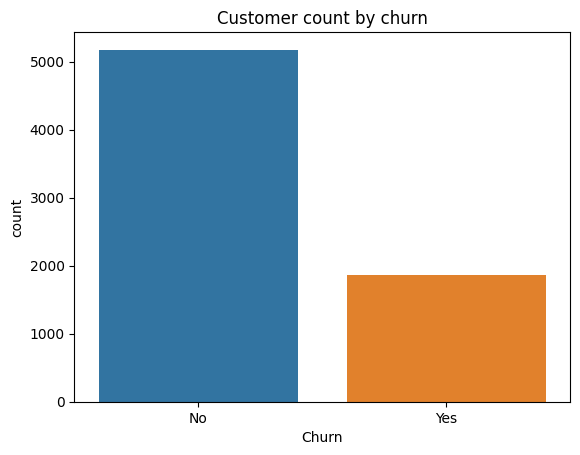

In [8]:
sns.countplot(df,x='Churn').set(title='Customer count by churn')
print(df['Churn'].value_counts(),'\n',
      'Percentage of clients that churned:' , round(df['Churn'][df['Churn']=='Yes'].value_counts()[0]/len(df),2),'\n',
      'Percentage of clients that stayed with the company:', round((1-(df['Churn'][df['Churn']=='Yes'].value_counts()[0])/len(df)),2))

We have imbalanced data. About 27% of the customers churned. Almost 73% of the customers stayed with the company.
1869 customer churned while 5174 customer did not.

In [9]:
le = LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])
num_cols= df.select_dtypes('number').columns
cat_cols = df.select_dtypes('object').columns

print(
f'Numerical Columns:  {df[num_cols].columns}','\n','\n',
f'Categorical Columns: {df[cat_cols].columns}')

Numerical Columns:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object') 
 
 Categorical Columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [10]:
df[num_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


Text(0.5, 0.98, 'Histograms of numerical variables')

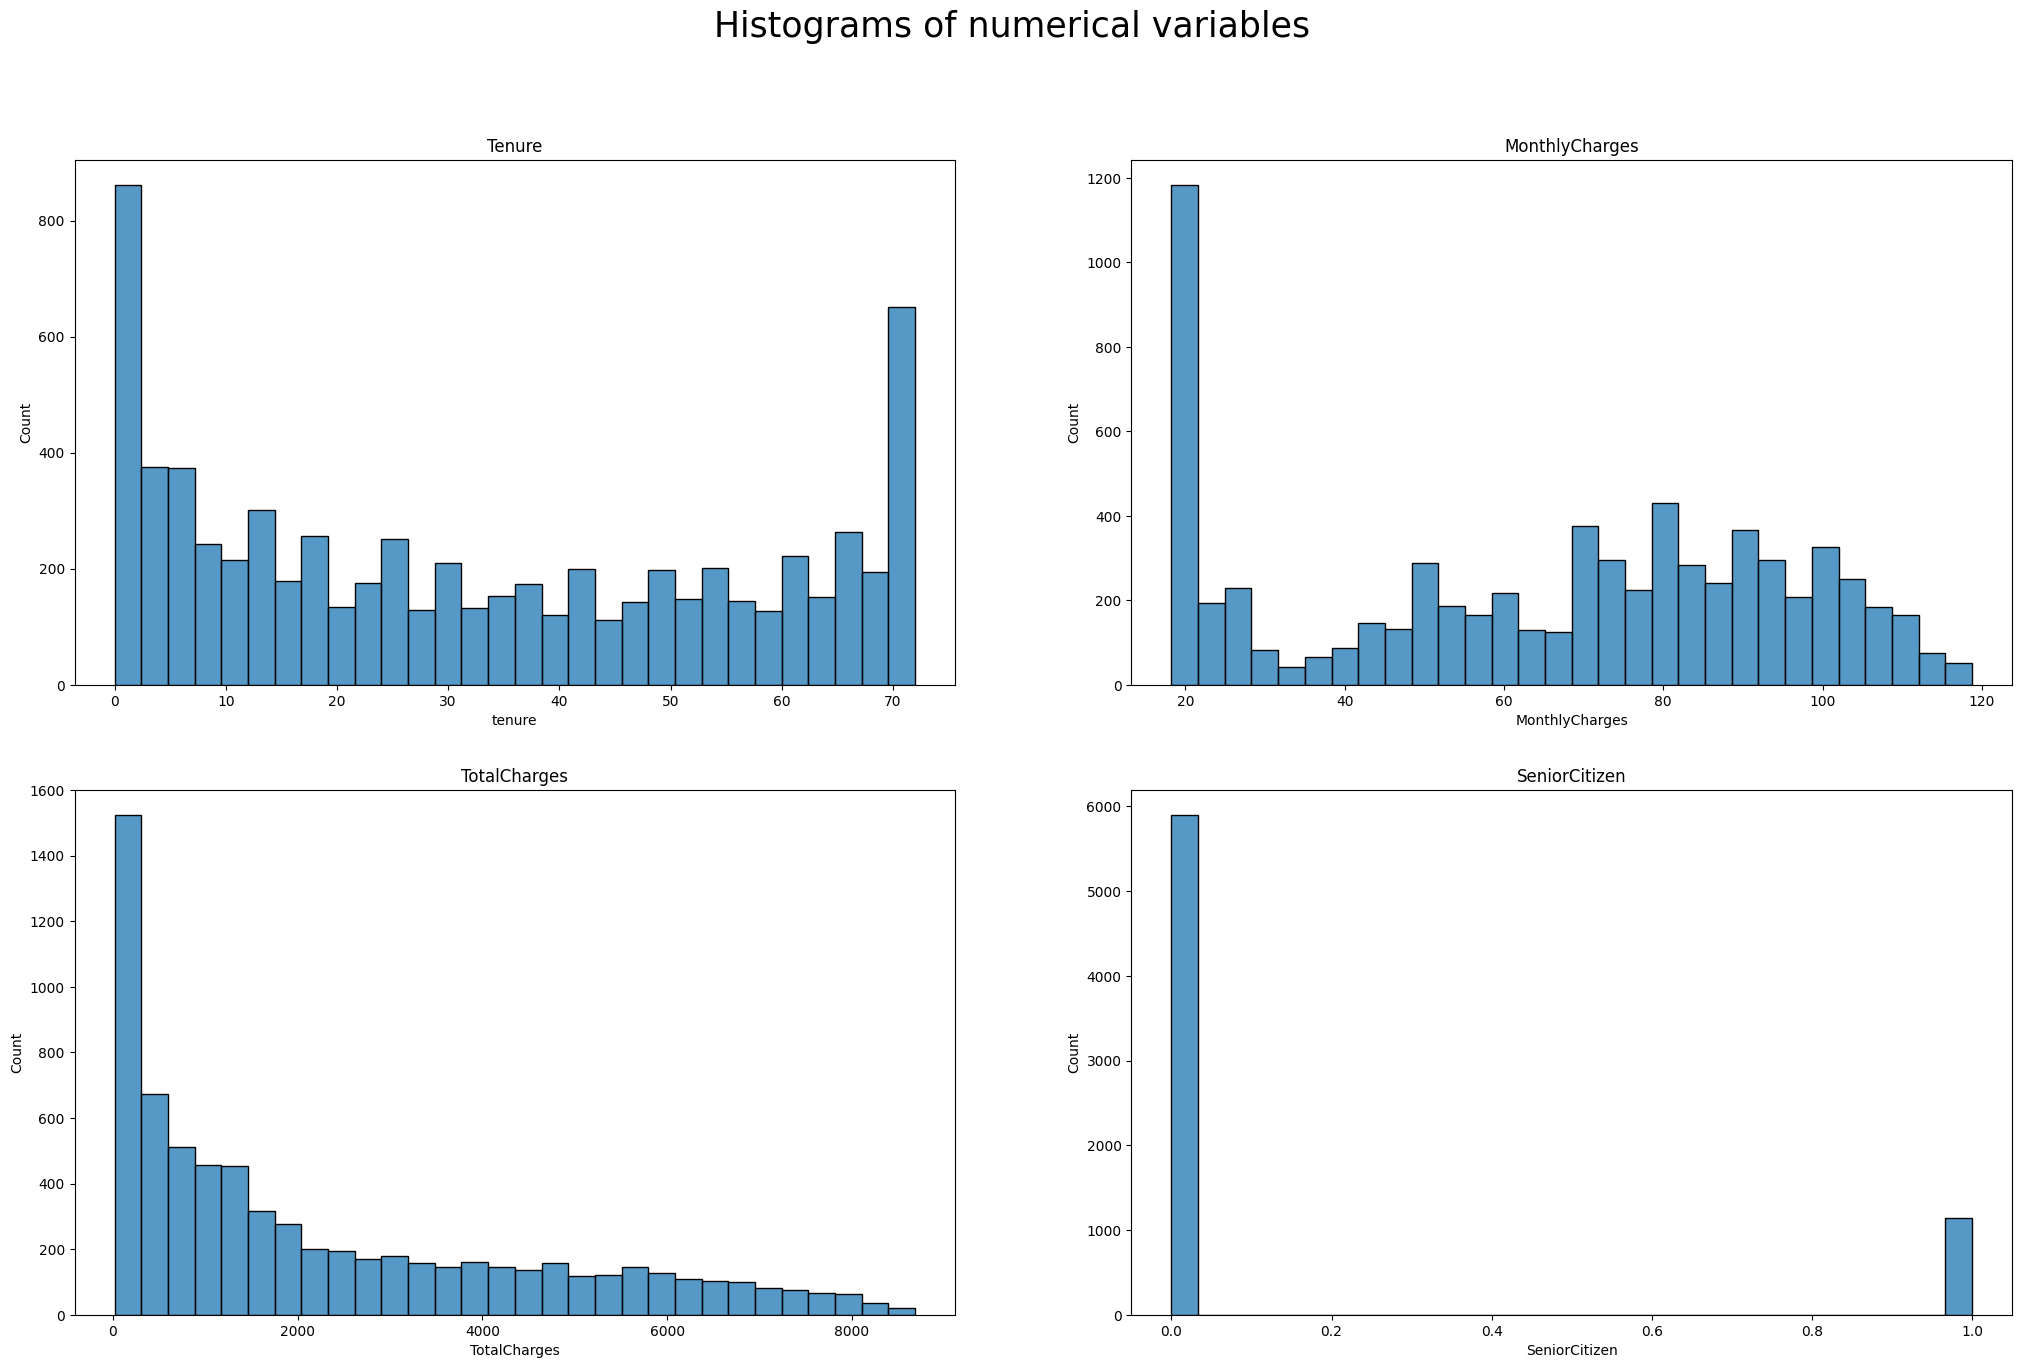

In [17]:
fig, ax =plt.subplots(2,2)
plt.rcParams["figure.figsize"] = [23, 15]
sns.histplot(data=df,x='tenure',bins=30,ax=ax[0][0]).set(title='Tenure')
sns.histplot(data=df,x='MonthlyCharges',bins=30,ax=ax[0][1]).set(title='MonthlyCharges')
sns.histplot(data=df,x='TotalCharges',bins=30,ax=ax[1][0]).set(title='TotalCharges')
sns.histplot(data=df,x='SeniorCitizen',bins=30,ax=ax[1][1]).set(title='SeniorCitizen')
fig.suptitle('Histograms of numerical variables',size=25)

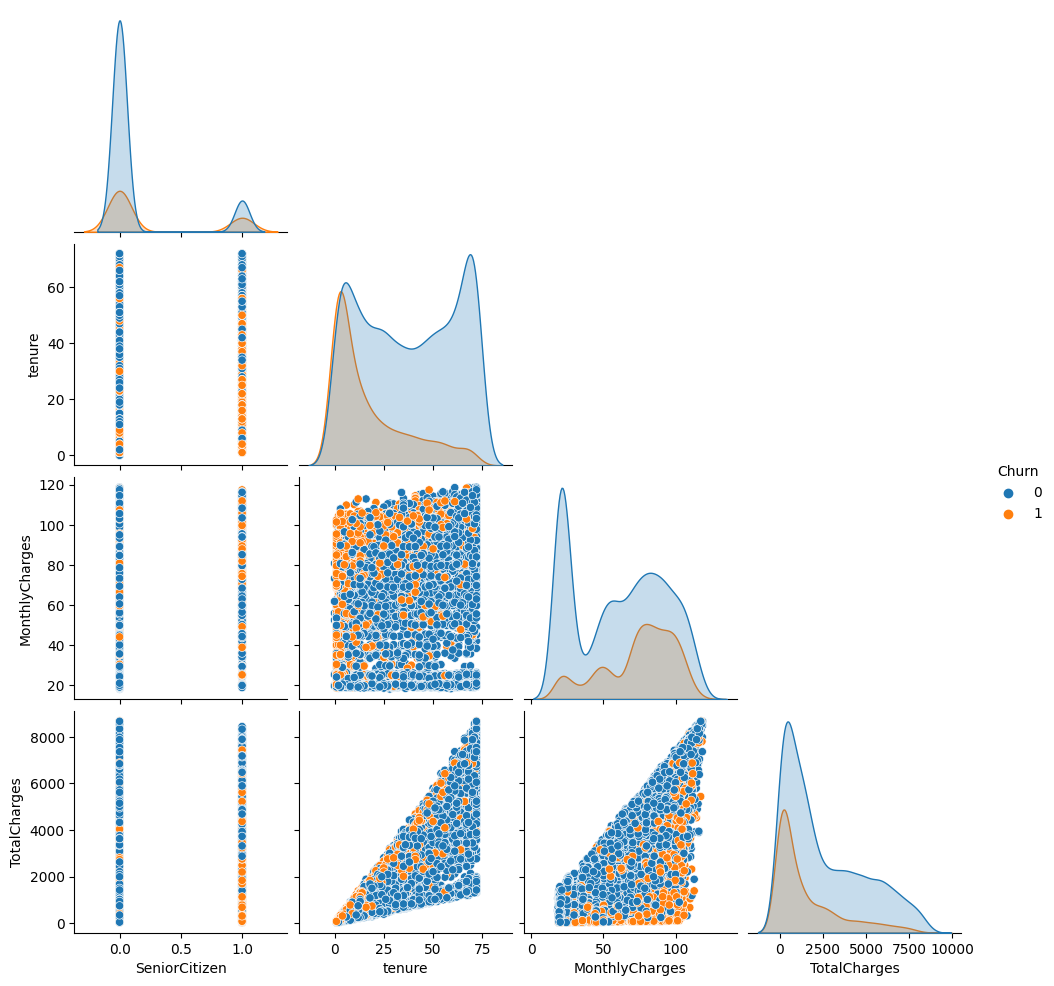

In [18]:
sns.pairplot(data=df,hue='Churn',corner=True)

Clients with shorter tenure have a higher chance of churn. The higher MonthlyCharges client has the more likely he is to Churn. Senior Citizens tend to Churn more often. We will examine it using correlation.

<Axes: >

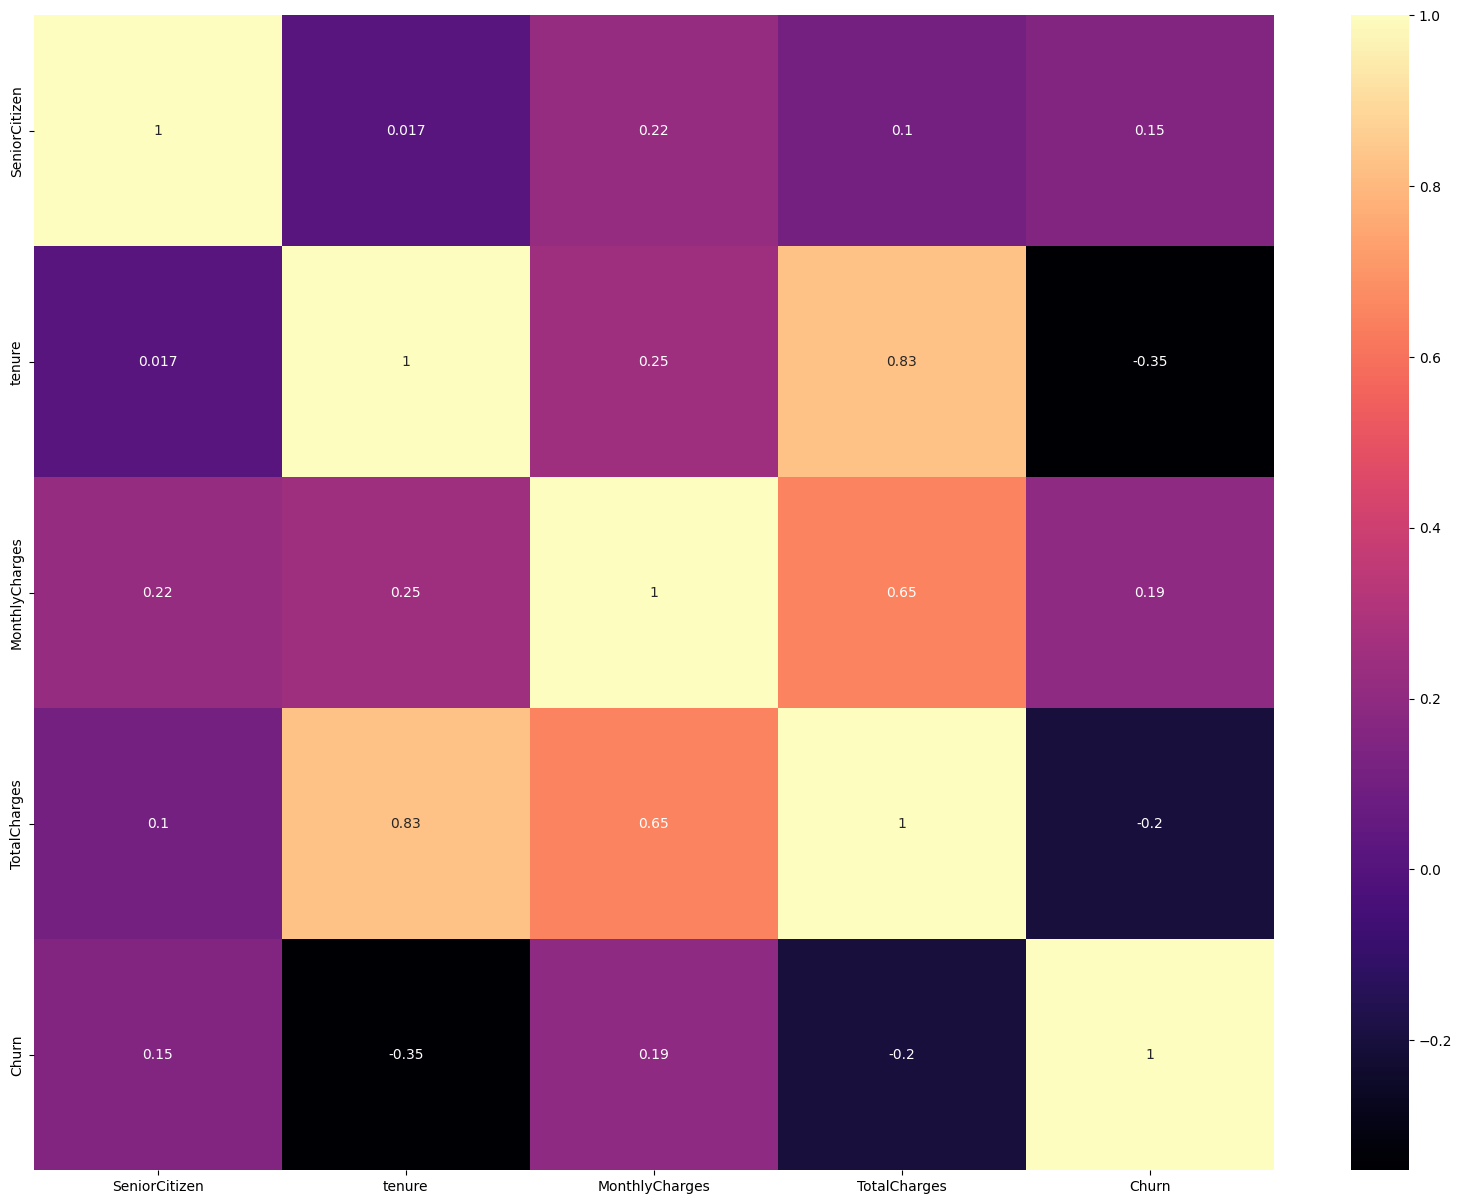

In [13]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap="magma")

The analysis of the dataset reveals several noteworthy correlations between the numerical features and the target variable:

- We observe a modest level of correlation between the numerical features and the target variable.
- Senior citizen status and higher monthly charges exhibit a positive correlation with customer churn.
- Senior citizens are more prone to churn compared to younger customers.
- Customers with elevated monthly charges are also more inclined to churn in contrast to those with lower monthly charges.
- Long-term customers are less likely to churn compared to those with a shorter history with the company.
- A robust positive correlation exists between tenure and total charges.
- Notably, total charges demonstrate a negative correlation with churn.

## Bivariate analysis

In [47]:
# Adding merged column to analyze Churn depending on contract type and column
df['merged']=df['Churn'].astype(str)+' : '+df['Contract']

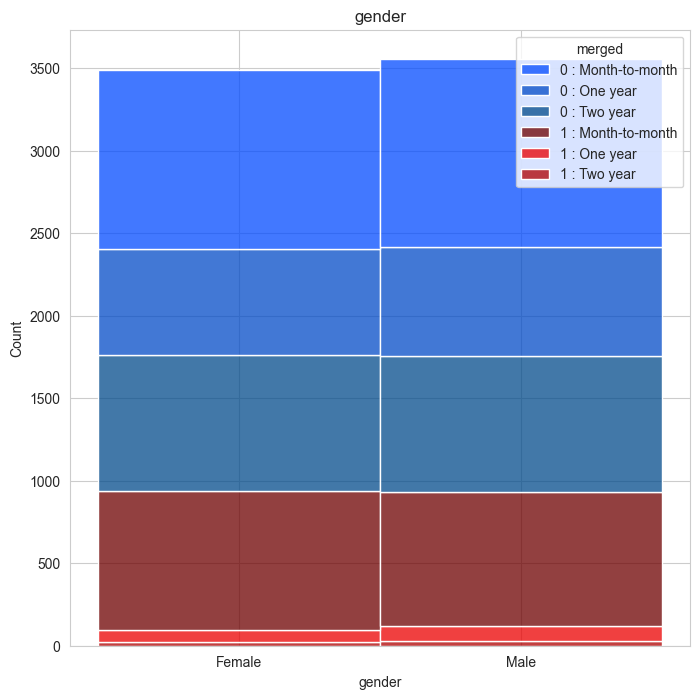

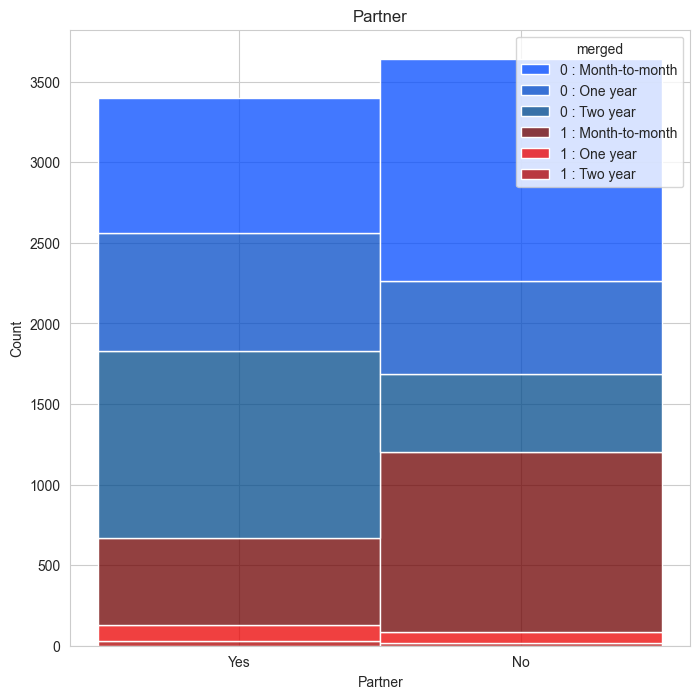

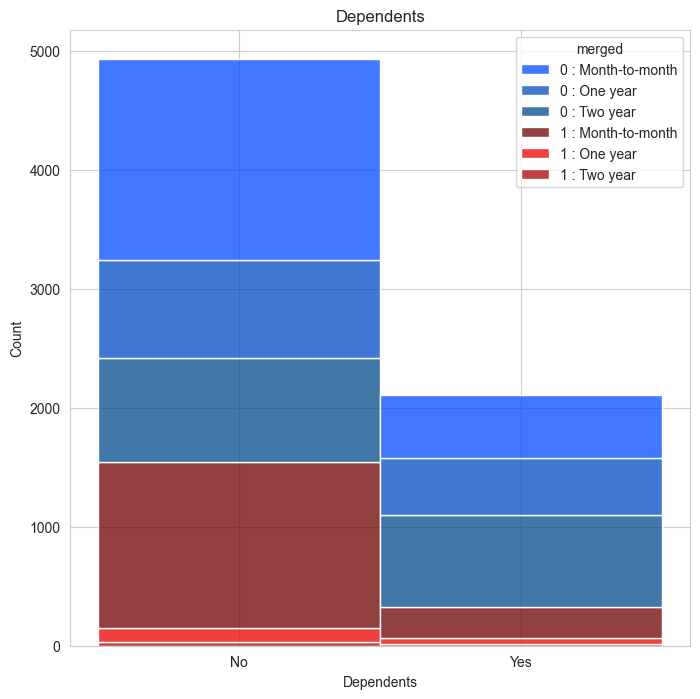

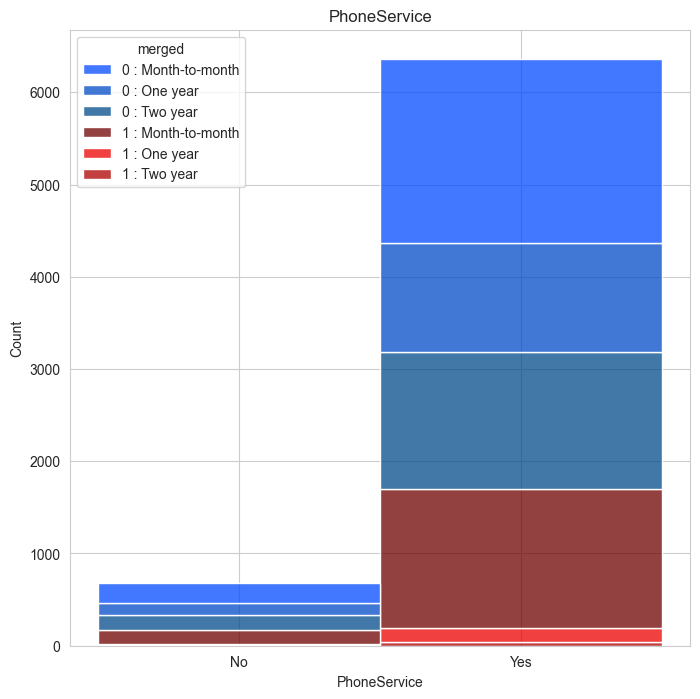

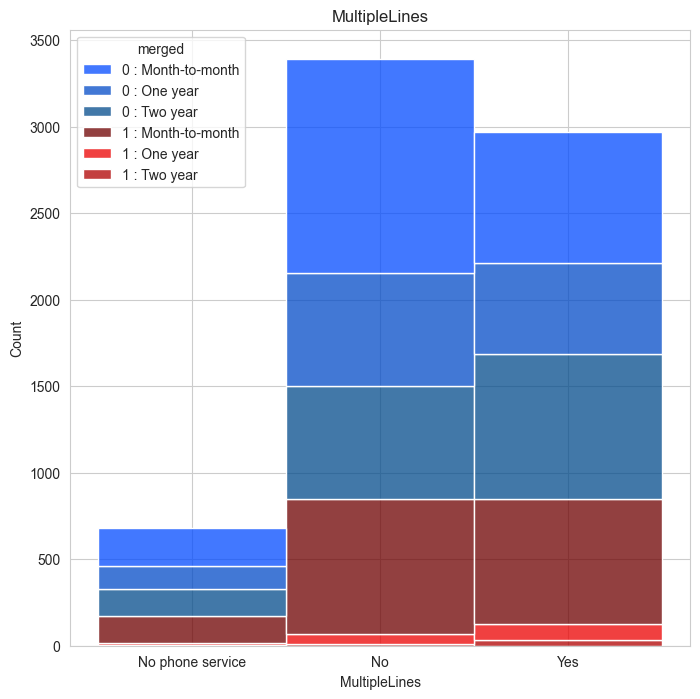

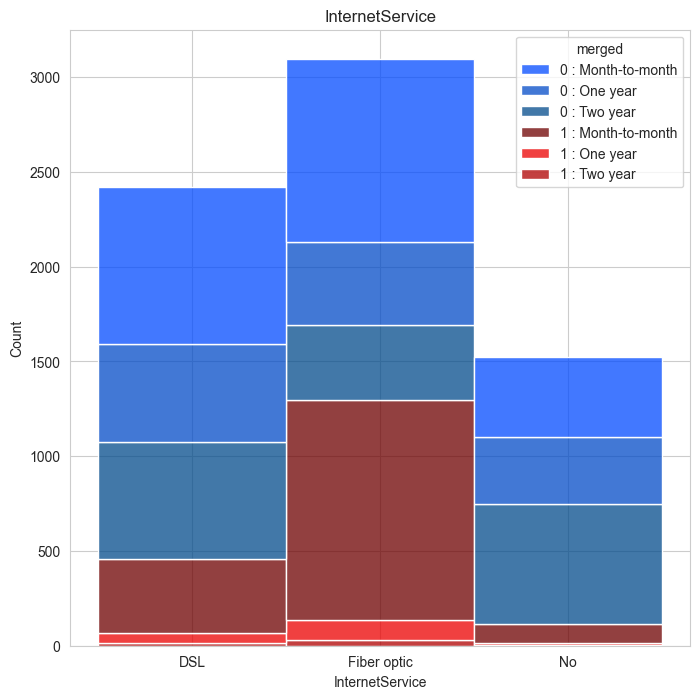

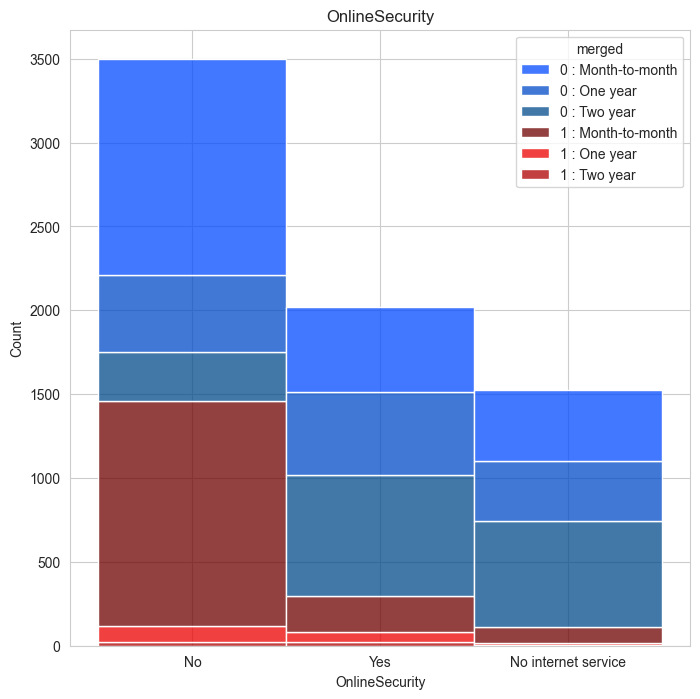

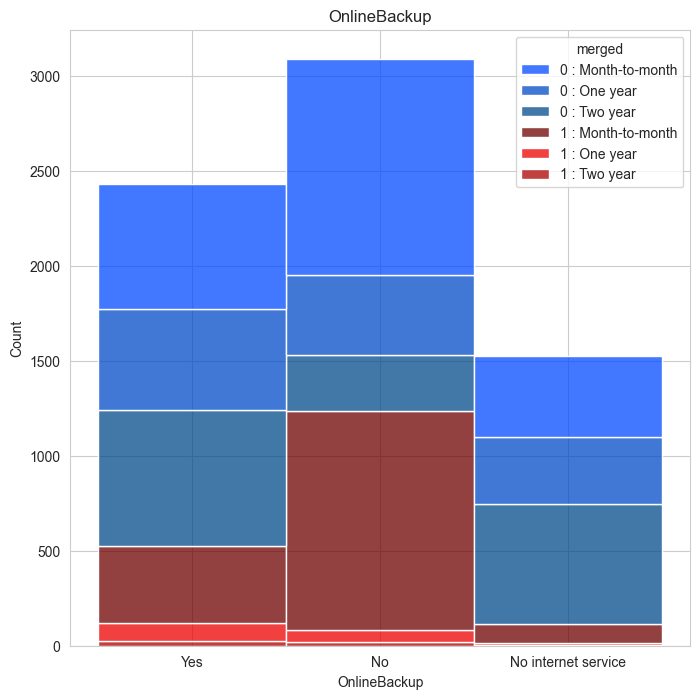

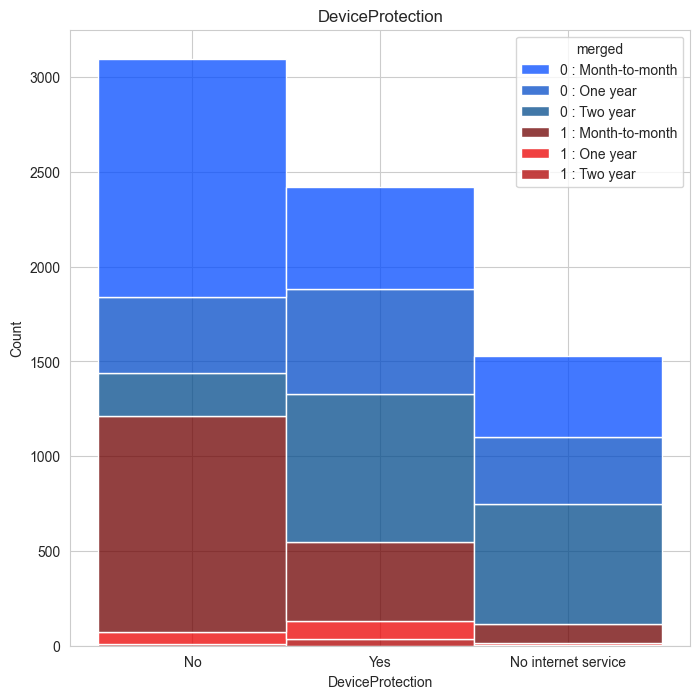

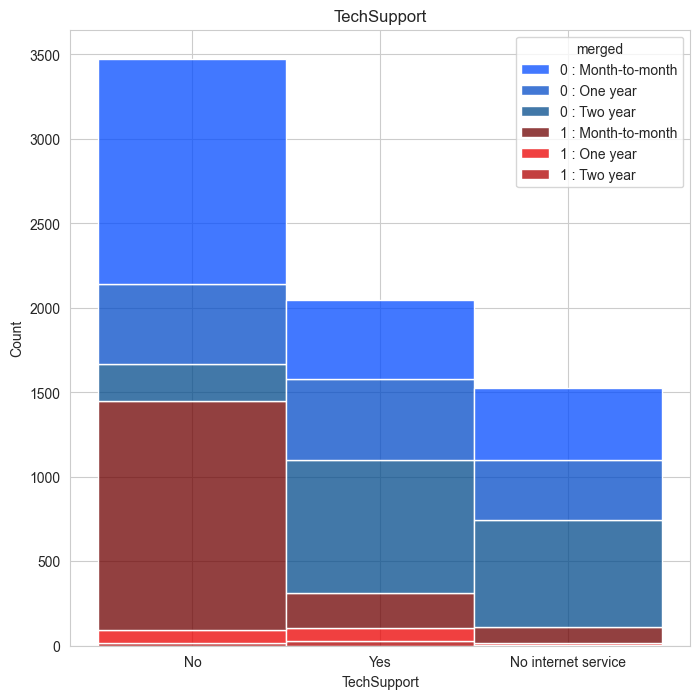

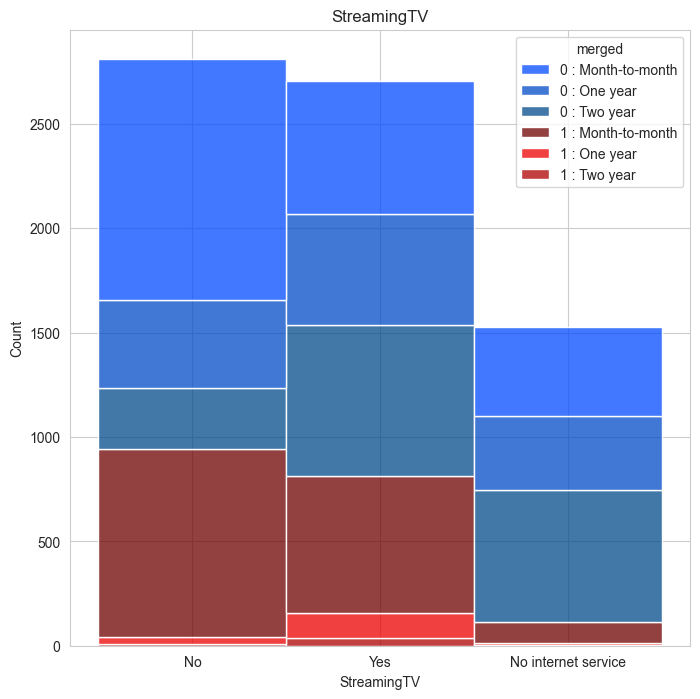

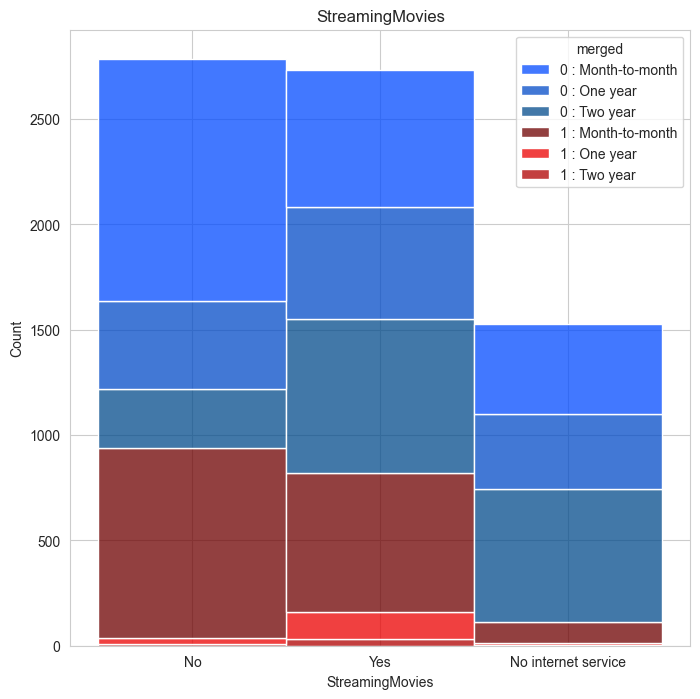

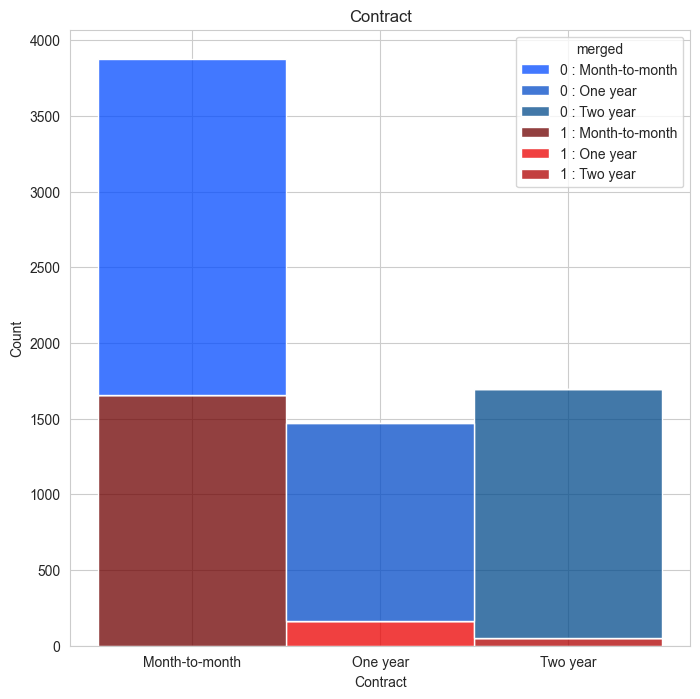

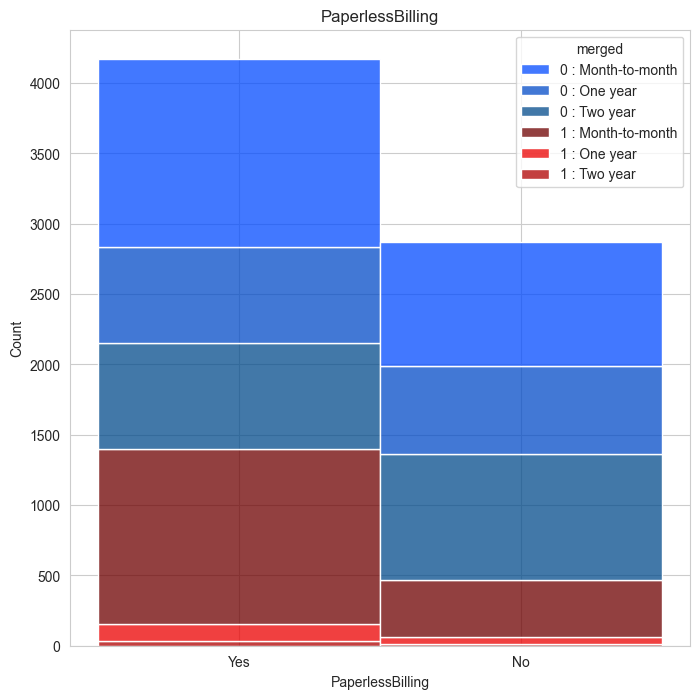

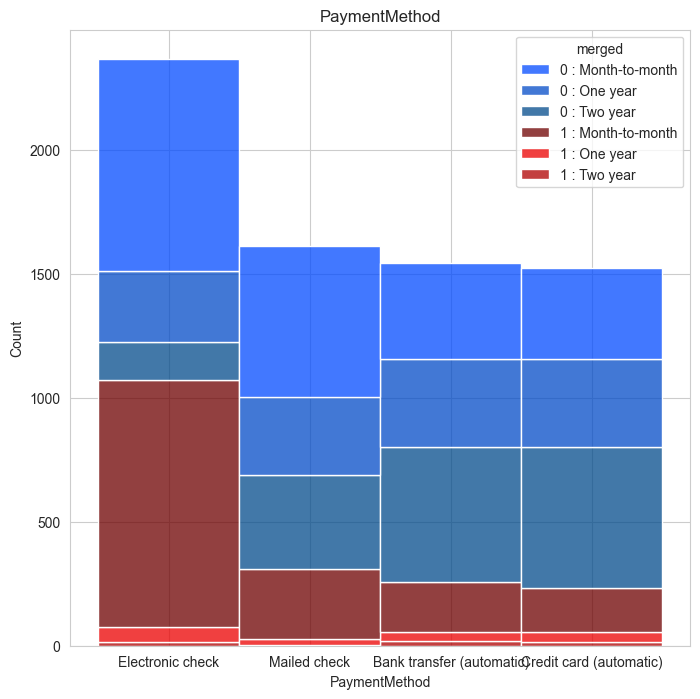

In [53]:
colors = {'0 : Month-to-month':'#024bff', '0 : One year':'#024bc7',
       '0 : Two year':'#024b8b', '1 : Month-to-month':'#6e0000', '1 : Two year':'#af0000', '1 : One year':'#eb0000'}
for i, col in enumerate(df[cat_cols].columns):
    plt.figure(figsize=(8, 8))
    sns.histplot(data=df, hue="merged", x=col, multiple="stack",palette=colors,hue_order=['0 : Month-to-month', '0 : One year',
       '0 : Two year','1 : Month-to-month', '1 : One year','1 : Two year'])
    plt.title(col)
    plt.show()

## Modeling


In [57]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,merged
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0 : Month-to-month
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0 : One year
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 : Month-to-month


In [55]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1973)